<a href="https://colab.research.google.com/github/ldarkeas/tareasluis/blob/main/3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
import numpy as np

In [110]:
datos = pd.read_csv('U4_01_housing.csv')
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [111]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

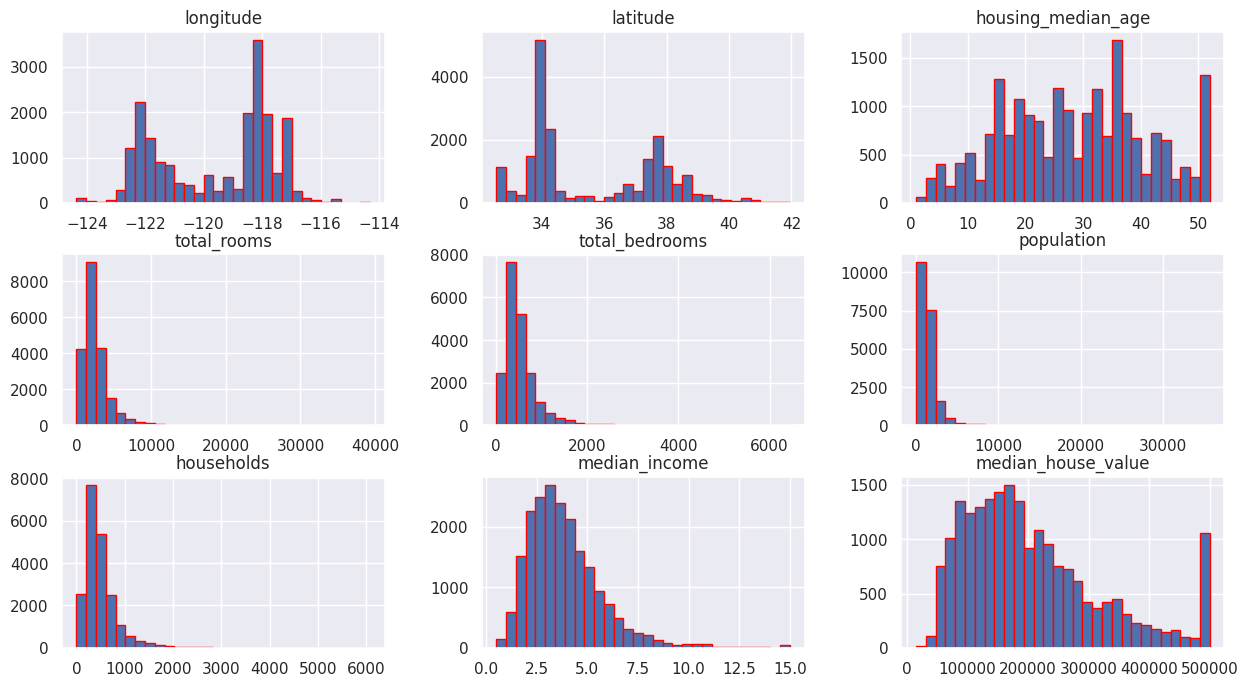

In [112]:
datos.hist( figsize=(15,8), bins=30, edgecolor = 'red' )

In [113]:
datos_na = datos.dropna()
datos_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


<Axes: xlabel='latitude', ylabel='longitude'>

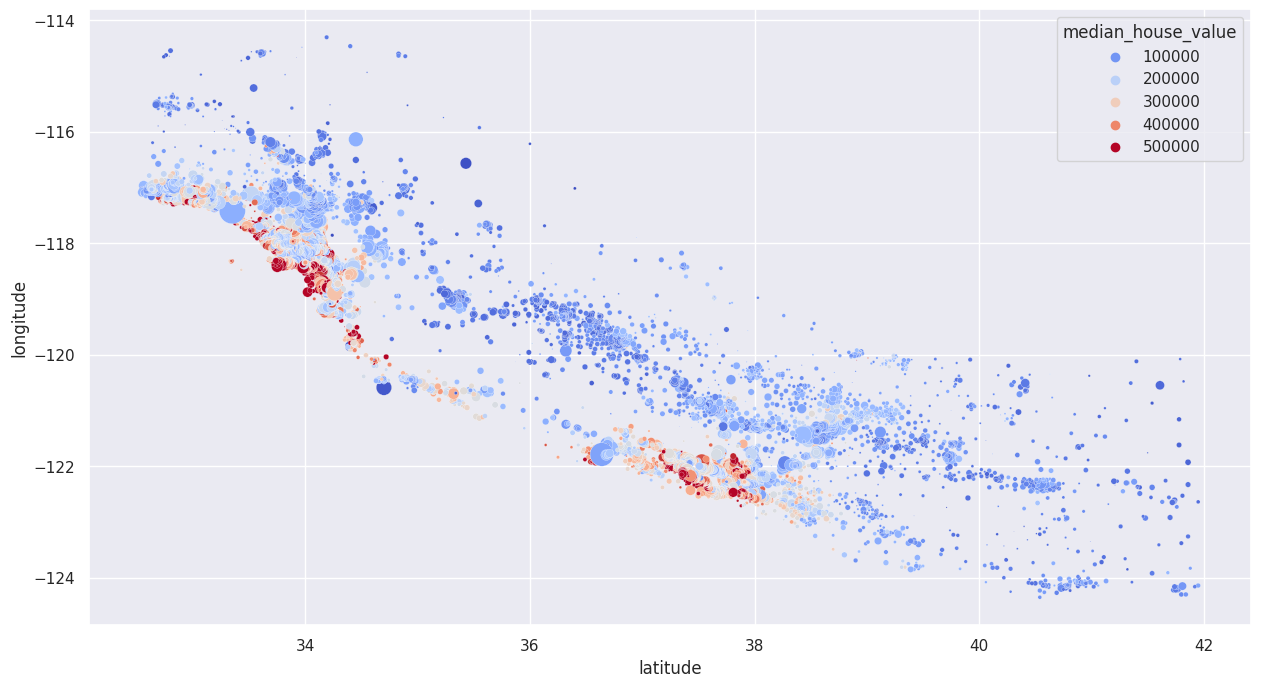

In [114]:
import seaborn as sb

sb.scatterplot(x='latitude', y='longitude', data=datos_na, hue='median_house_value', s=datos_na['population']/100, palette='coolwarm')

In [115]:
dummies = pd.get_dummies(datos_na['ocean_proximity'], dtype=int)
datos_na = datos_na.join(dummies)

In [116]:
datos_na = datos_na.drop(['ocean_proximity'], axis=1)
datos_na.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.003777,0.026477,-0.007603,-0.023647,-0.008674
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,0.073450,-0.019602,-0.010451,-0.061480,-0.023498
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,0.041883,-0.038265,-0.009119,-0.011280,0.002106
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378
<1H OCEAN,0.320831,-0.446928,0.045553,-0.003777,0.018314,0.073450,0.041883,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018


<Axes: >

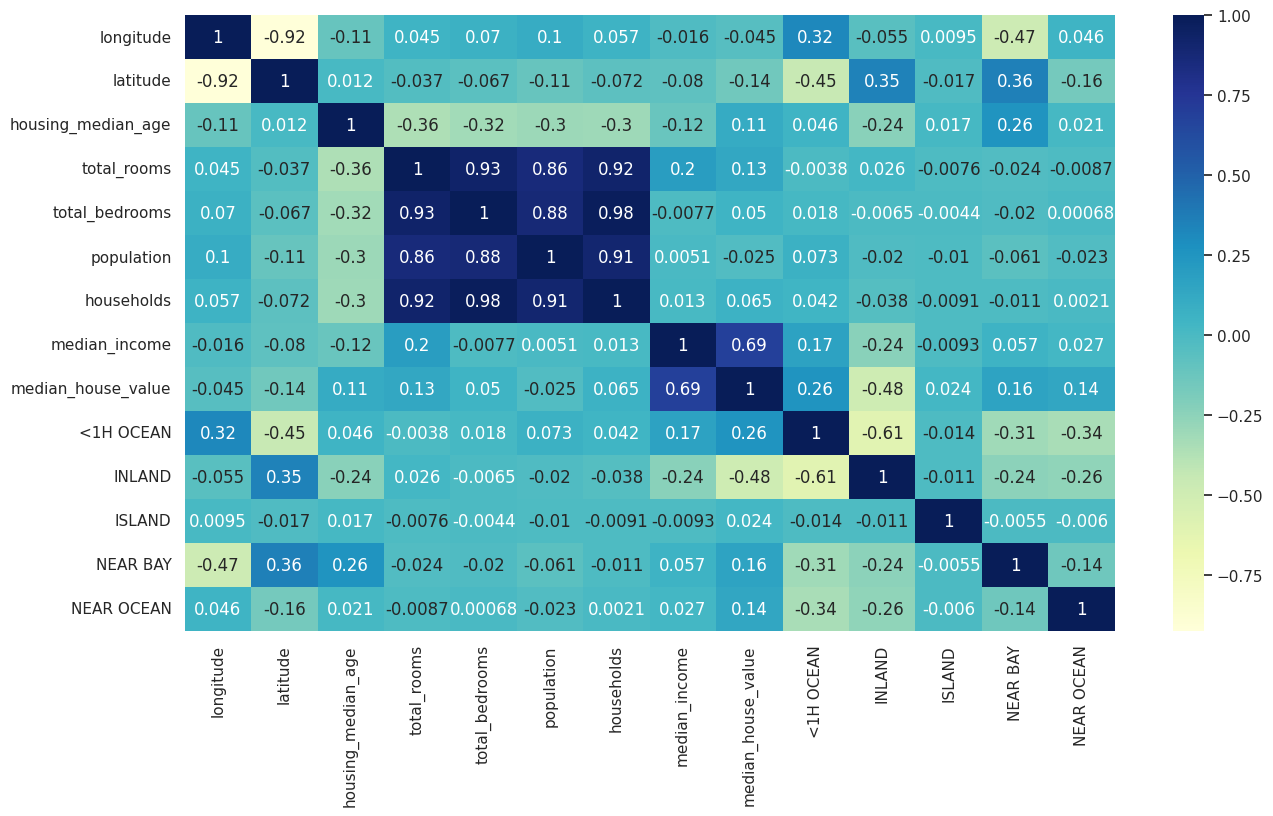

In [117]:
sb.set(rc={'figure.figsize':(15,8)})
sb.heatmap(data=datos_na.corr(), annot=True, cmap='YlGnBu' )

In [118]:
datos.corr()['median_house_value'].sort_values(ascending=False)

<ipython-input-118-2dc99b01b93d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datos.corr()['median_house_value'].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<Axes: xlabel='median_house_value', ylabel='median_income'>

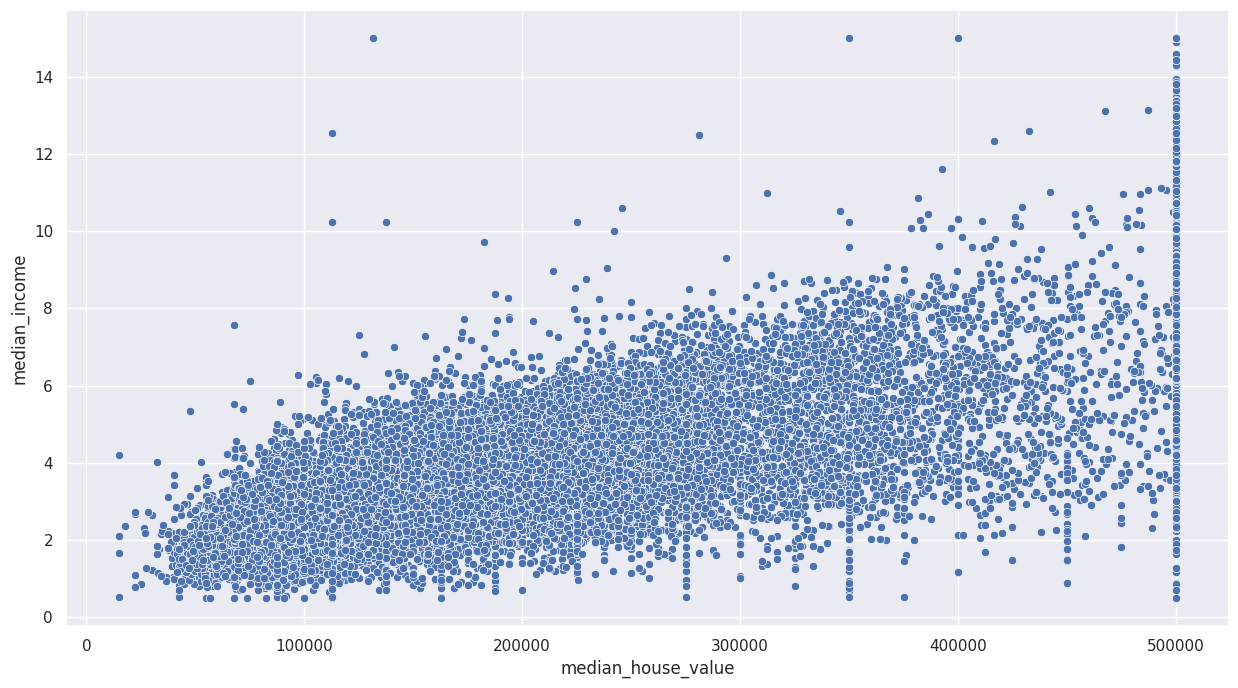

In [119]:
sb.scatterplot(x=datos_na['median_house_value'], y=datos_na['median_income'])

In [120]:
datos_na['room_ratio'] = datos_na['total_bedrooms'] /  datos_na['total_rooms']

<Axes: >

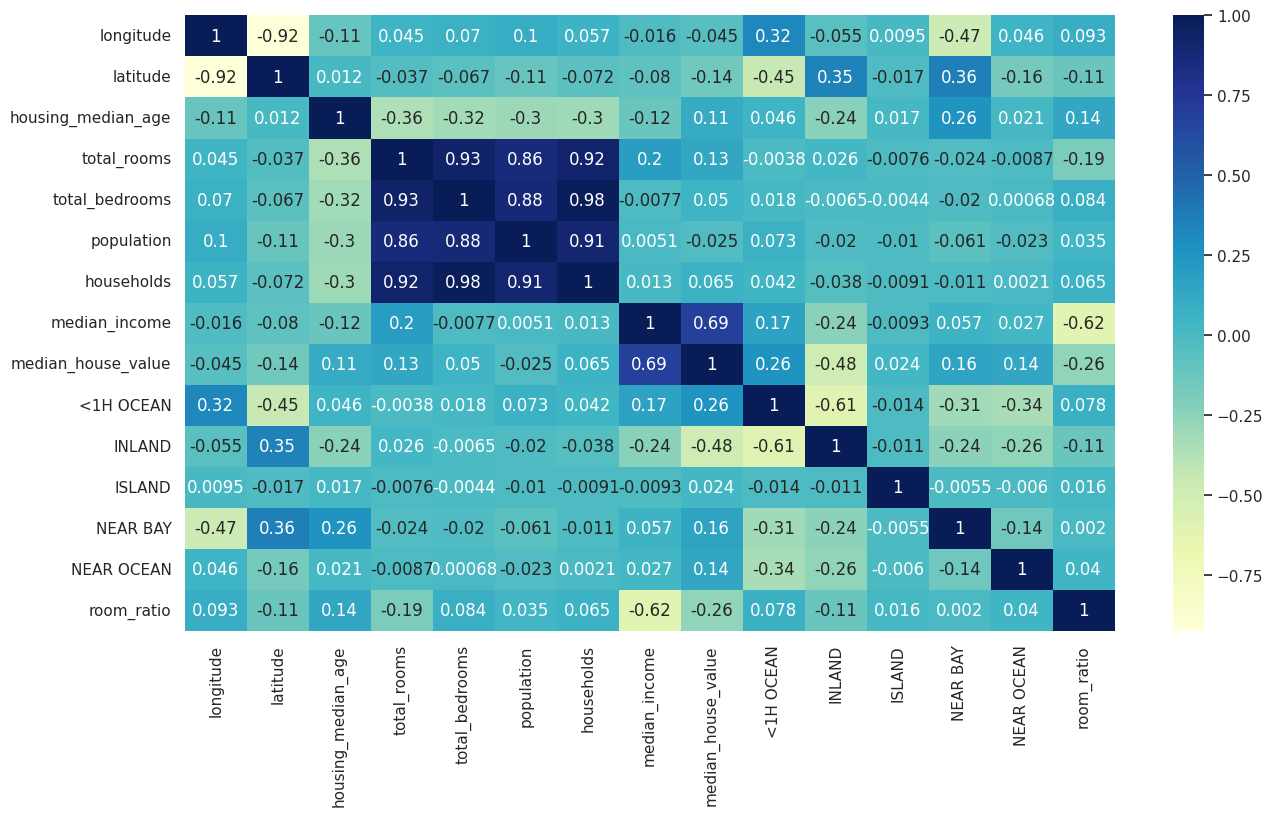

In [121]:
sb.set(rc={'figure.figsize':(15,8)})
sb.heatmap(data=datos_na.corr(), annot=True, cmap='YlGnBu' )

In [122]:
X = datos_na.drop(['median_house_value'], axis=1)
y = datos_na['median_house_value']

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=.2)

In [124]:
#Aqui cree otro arbol ya que el que tenia antes costaba mucho procesarlo pero esta vez es mas sencillo para que asi se procese mas rapido

from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
import matplotlib.pyplot as plt


arbol_modelo = DecisionTreeRegressor(max_depth=8)#entre mas profundidad del arbol mejor porcentaje de acierto pero para visualizar el arbol es mas dificil
arbol_modelo.fit(X_train, y_train)



DecisionTreeRegressor(max_depth=8)

In [125]:
predicciones_arbol = arbol_modelo.predict(X_test)

In [126]:
#aqui esta el puntaje pero al ser un arbol mas sencillo tiene menor porcentaje
puntaje2 = arbol_modelo.score(X_test, y_test)
print(f'Puntaje es: {puntaje2}')

Puntaje es: 0.7111603296453117


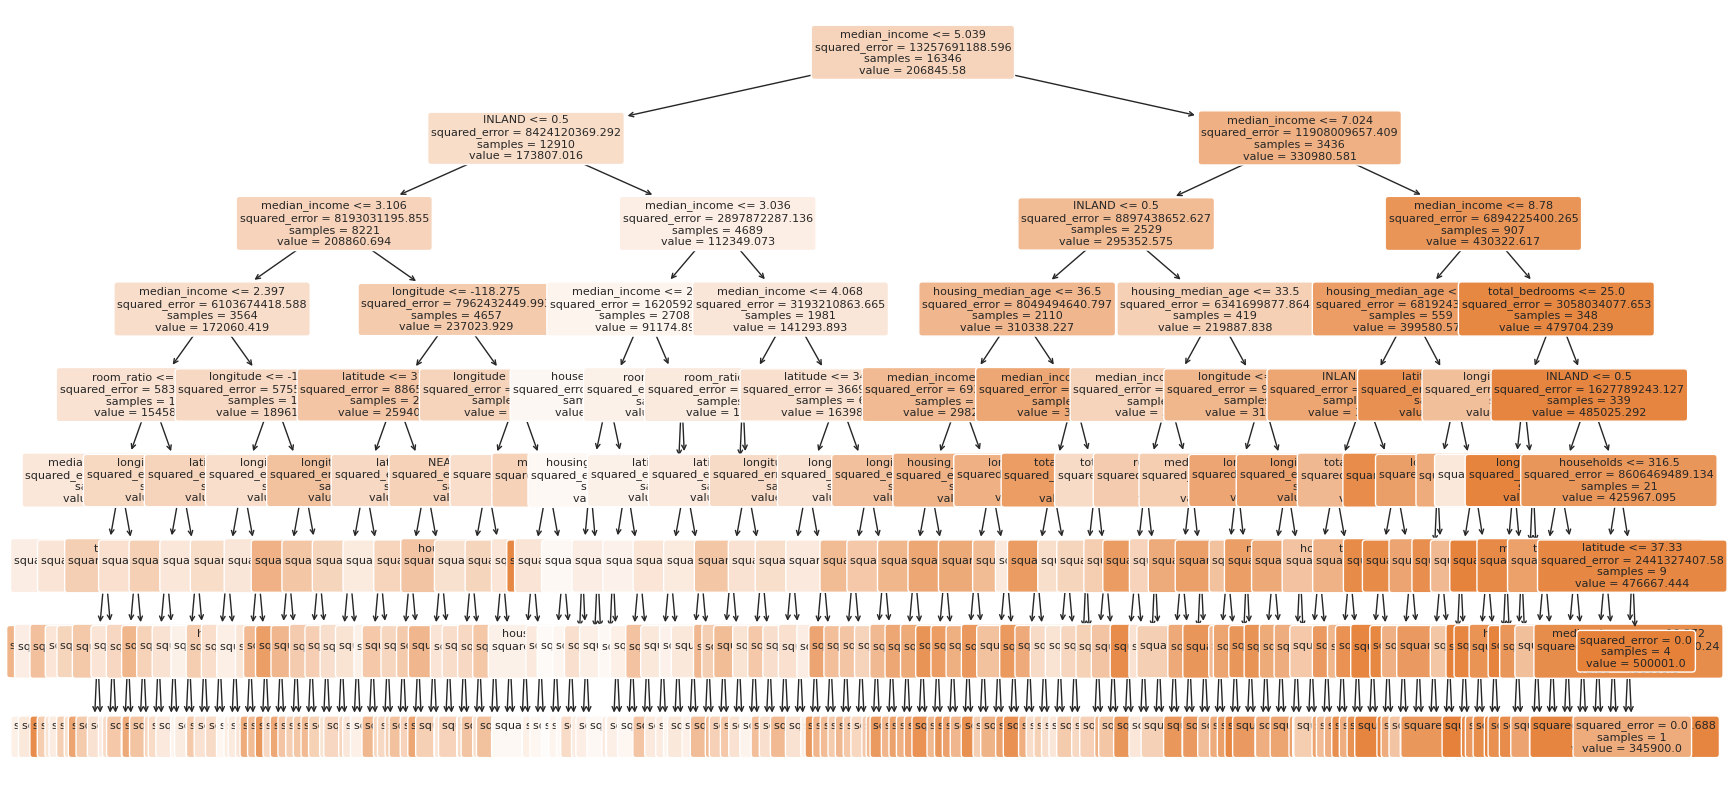

In [127]:
#Aqui se ve el árbol
plt.figure(figsize=(20, 10))
plot_tree(arbol_modelo, filled=True, feature_names=list(X.columns), rounded=True, fontsize=8)
plt.show()
